<a href="https://colab.research.google.com/github/inhaWJ/CRC/blob/main/%EB%8C%80%EC%9E%A5%EC%95%94_%EB%B0%9C%EB%B3%91_%ED%98%84%ED%99%A9_%EC%A1%B0%EC%82%AC_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **직종, 연령, 성별 별 대장암 발병 조사 및 분류 프로젝트**


## 1. 환경 설정 및 데이터 준비
**1.1 한글 폰트 설치**

**1.2 런타임 재시작**

**1.3 한글 폰트 설정**

**1.4 데이터 준비**

**csv파일 : https://github.com/inhaWJ/CRC/blob/main/%EA%B5%AD%EB%AF%BC%EC%95%94%EC%84%BC%ED%84%B0_%EB%8C%80%EC%9E%A5%EC%95%94_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC_%ED%99%98%EC%9E%90_%EC%88%98_API.ipynb**

---

## 2. 직업으로 분류한 대장암 환자 수
**2.1 대장암 환자 직업 조사**

**2.2 직업 유무에 따른 대장암 환자 수**

---

## 3. 연령으로 분류한 대장암 환자 수
**3.1 대장암 환자 연령 조사**

**3.2 연령대로 나눈 환자 수**

---

## 4. 성별로 분류한 대장암 환자 수
**4.1 대장암 환자의 남녀 비율 조사**

---

## 5. 연도로 분류한 대장암 환자 수
**5.1 연도별 대장암 환자 수 조사**

---

## 1. 환경 설정 및 데이터 준비

---




> 1.1 한글 폰트 설치


In [3]:
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()



> 1.2 런타임 재시작



In [ ]:
import os
os.kill(os.getpid(), 9)



> 1.3 한글 폰트 설정



In [1]:

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

# seaborn 라이브러리로 시각화할 때 한글 깨짐 현상 해결



> 1.4 데이터 준비



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# csv파일은 깃허브주소 참조
# csv파일을 읽어 cp949로 인코딩
df_1 = pd.read_csv('/content/cancerData.csv', encoding='cp949')
df_1

,statsMetaNo,centerNm,critYr,ptAge,ptSexCd,statsTrgtNm,ncsNmvl,wholNcsDnmvl,ptCntNmvl,wholPtCntDnmvl
0,15030,건양대학교병원,2012,24,F,자유업,2,2,1,1
1,15030,건양대학교병원,2012,30,M,무직,2,2,1,1
2,15030,건양대학교병원,2012,34,M,회사원,1,1,1,1
3,15030,건양대학교병원,2012,36,F,자유업,2,2,1,1
4,15030,건양대학교병원,2012,41,F,주부,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
21667,15030,가천대길병원,2018,87,M,무직,1,1,1,1
21668,15030,가천대길병원,2018,89,F,무직,1,1,1,1
21669,15030,가천대길병원,2018,89,M,무직,1,1,1,1
21670,15030,가천대길병원,2018,91,F,무직,1,1,1,1


# 2. 직업으로 분류한 대장암 환자 수


---



2.1 대장암 환자 직업 조사

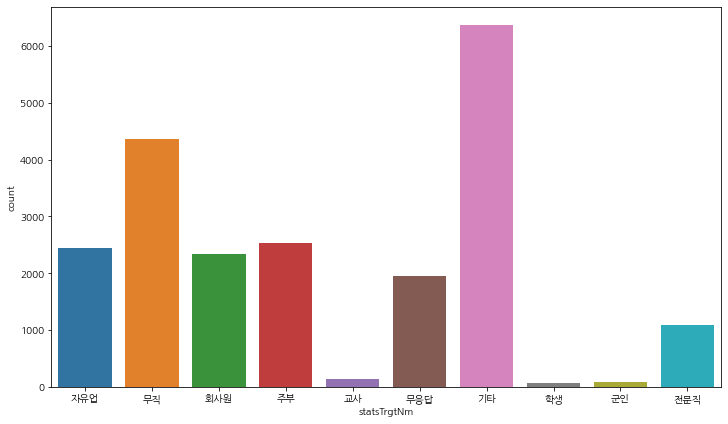

In [4]:
# 크기 설정
plt.figure(figsize=(12, 7))

# 직업 별 대장암 환자 수
sns.countplot(data=df_1, x='statsTrgtNm')

plt.show()

2.2 직업 유무에 따른 대장암 환자 수

In [5]:
# 직업이 있으면 직업 있음, 없으면 무직으로 분류
# 주부, 학생도 직업으로 분류
df_job = df_1
df_job = df_job.assign(jobYN = np.where(df_job['statsTrgtNm'] == '무직', '무직', '직업 있음'))

# 값을 세어 출력
df_job['jobYN'].value_counts()

직업 있음    17307
무직        4365
Name: jobYN, dtype: int64

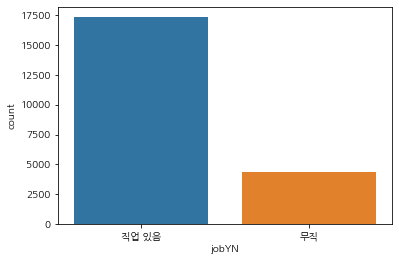

In [145]:
sns.countplot(data=df_job, x='jobYN')

# 3. 연령으로 분류한 대장암 환자 수

---


3.1 대장암 환자 연령 조사

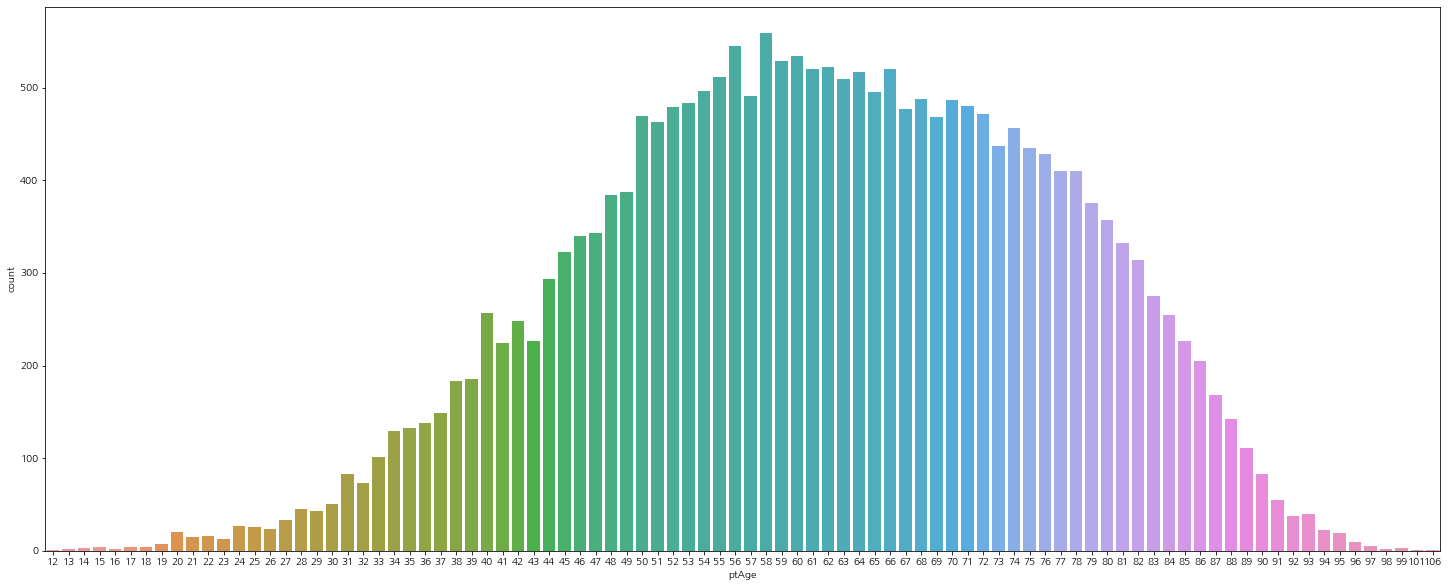

In [6]:
# 크기 설정
plt.figure(figsize=(25, 10))

# 동일한 연령에서 대장암 환자 수를 시각화
sns.countplot(data=df_1, x='ptAge')
plt.show()

3.2 연령대로 나눈 환자 수

In [7]:
# 10대부터 90대 이상까지 분류하기
# df_job를 사용하여 직업 유무도 표현할 수 있게 하기
df_age = df_job
df_age = df_age.assign(ageg = np.where(df_age['ptAge'] < 20, '10대',
                              np.where(df_age['ptAge'] < 30, '20대',
                              np.where(df_age['ptAge'] < 40, '30대',
                              np.where(df_age['ptAge'] < 50, '40대',
                              np.where(df_age['ptAge'] < 60, '50대',
                              np.where(df_age['ptAge'] < 70, '60대',
                              np.where(df_age['ptAge'] < 80, '70대',
                              np.where(df_age['ptAge'] < 90, '80대', '90대 이상')))))))))

df_age['ageg'].value_counts()

60대       5050
50대       5028
70대       4390
40대       3026
80대       2386
30대       1225
90대 이상     279
20대        261
10대         27
Name: ageg, dtype: int64

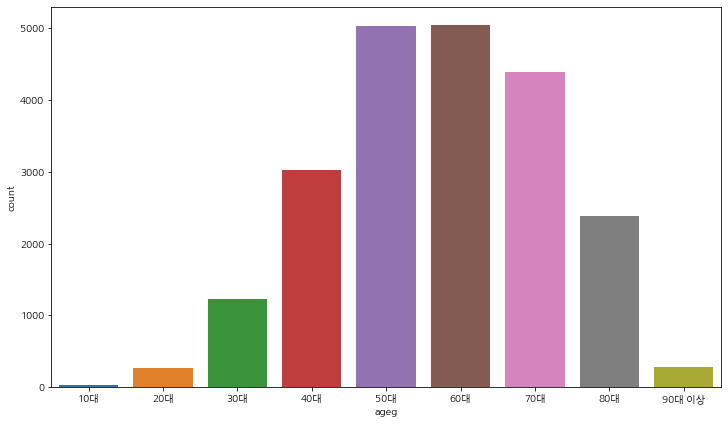

In [8]:
# 크기 설정
plt.figure(figsize=(12, 7))

# 위에서 분류한 연령대별환자 분류를 10대에서부터 오름차순으로 나오도록 정렬
sns.countplot(data=df_age, x='ageg', order=['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대 이상'])

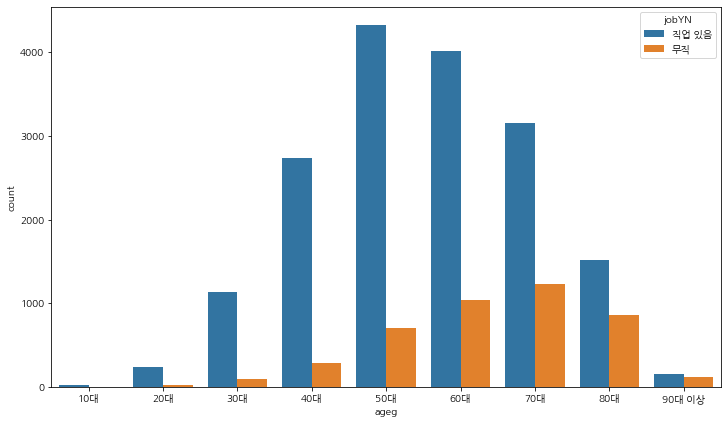

In [9]:
# 크기 설정
plt.figure(figsize=(12, 7))

# 위의 차트에서 직업 유무까지 추가
sns.countplot(data=df_age, x='ageg', hue='jobYN', order=['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대 이상'])

# 4. 성별로 분류한 대장암 환자 수

---



4.1 대장암 환자의 남녀 비율 조사

([<matplotlib.patches.Wedge at 0x7fc3a47b4400>,
 [Text(1.0899761209030627, -0.14816226193303117, '여자'),
  Text(-1.089976120903063, 0.14816226193303034, '남자')],
 [Text(0.5945324295834887, -0.0808157792361988, '45.7%'),
  Text(-0.5945324295834887, 0.08081577923619836, '54.3%')])

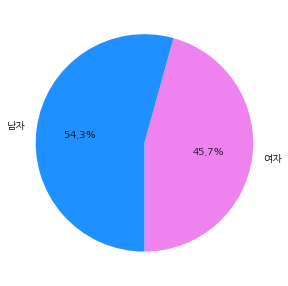

In [10]:
# 크기 설정
plt.figure(figsize=(5, 5))

# 성별 별 환자를 그룹으로 묶기
result=df_1.groupby('ptSexCd')['ptSexCd'].count()

# pie에 표기할 라벨 붙이기
labels=['여자', '남자']

# pie에 label과 비율 표기, 각도 설정, 색 설정
plt.pie(result, labels=labels, autopct='%.1f%%', startangle=270, colors=['violet', 'dodgerblue'])

# 5. 연도로 분류한 대장암 환자 수

---



5.1 연도별 대장암 환자 수 조사

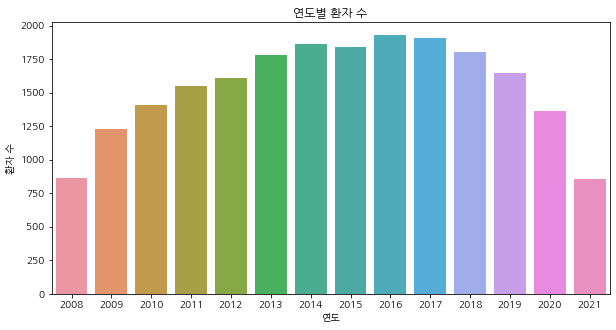

In [50]:
# 크기 설정
plt.figure(figsize=(10, 5))

# 연도별 환자 수를 표시
sns.countplot(data=df_1, x='critYr')

# 라벨 붙이기
plt.xlabel('연도')
plt.ylabel('환자 수')
plt.title('연도별 환자 수')
plt.show()
